# **ANN for Image Classification with Tensorflow 2.x**

The Goal of this project is build and train an ANN model for multiclass classification, by using MNIST dataset (hand written digits).

In [0]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


## **Load data**
The data can be directly load from tensorflow keras.

In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

## **Data pre-processing**
In order to training the model, we need to split the data into training set and test set.

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's inspect the dataset first, see few examples in the dataset.

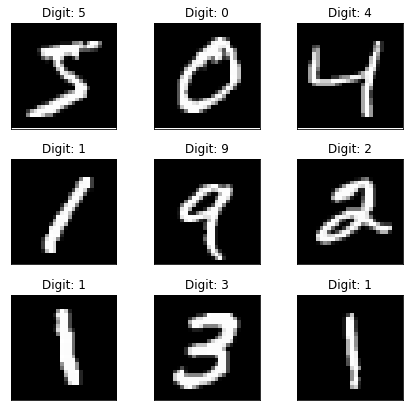

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize']=[6,6]

Notice that this dataset is a greyscale image dataset, which means the value of each pixel is range from 0 to 255. So, most commonly, we scale the value of pixels (x_train and x_test) into range 0 to 1. Leave y_train and y_test as it since they are the labels.

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print("shape of training images:",x_train.shape)
print("shape of test images:",x_test.shape)

shape of training images: (60000, 28, 28)
shape of test images: (10000, 28, 28)


By looking into the shape of training and test images, we know that the size of images are all 28x28, we have 60000 images for training set, 10000 images for test set.

# **Build and Train the ANN Model**
Next, we are going to build-up an ANN model and training it using Keras API.

The first input layer has the number of neurons=28x28, we vectorize the maxtrix by using Flatten layer, then we connect the flattern layer to a hidden layer with 128 nodes, 'relu' as the activation function, 20% dropout rate to prevent over fitting. Eventually the third layer is the output layer with 10 output nodes represent 10 different outcomes. Since the output results should be probabilities, thus the activation function at this layer is 'softmax'.

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

Now, we compile the model with Adam as the optimization algorithm, cross entropy as the loss function and accuracy as the evaluation metric.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Next, we train the model with training set for 10 epoch and evaluate the model using test set.

In [0]:
r = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2908 - accuracy: 0.9149 - val_loss: 0.1389 - val_accuracy: 0.9584
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1430 - accuracy: 0.9572 - val_loss: 0.0973 - val_accuracy: 0.9711
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1070 - accuracy: 0.9672 - val_loss: 0.0843 - val_accuracy: 0.9752
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0869 - accuracy: 0.9735 - val_loss: 0.0767 - val_accuracy: 0.9763
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.0799 - val_accuracy: 0.9759
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.0693 - val_accuracy: 0.9791
Epoch 7/10
60000/60000 [==============================] 

We can see that the accuracy for validation data (test set) is 98%, accuracy of training set is 98.5%, they are pretty close which means the model is not overfitting. Next let's plot the loss and accuarcy.

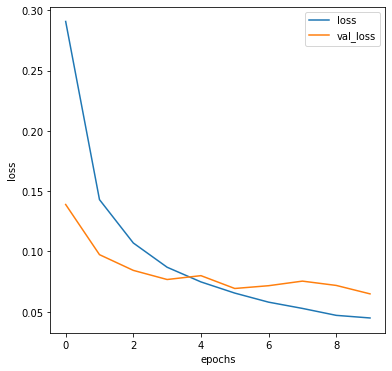

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.rcParams['figure.figsize']=[6,6]

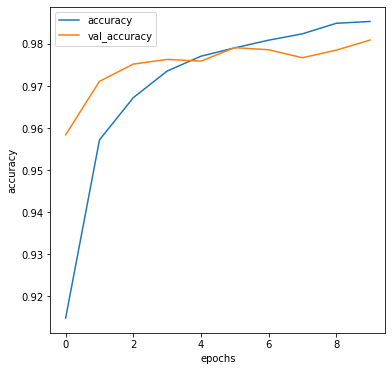

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.rcParams['figure.figsize']=[6,6]

In [0]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0648 - accuracy: 0.9809
[0.06480235994455288, 0.9809]


# **Evaluation**
Now, we are going to evaluate the result by using a confusion matrix, which can give us not only the accuracy, but also more detailed result, including true positive, true negative, false positive and false negative.

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

We predict the result by using the model we just trained.

In [0]:
y_pred = model.predict(x_test).argmax(axis=1)

Since the prediction result for each sample is an numpy array of probabilities, we just pick the one with the largest probability, its index as the predicted label.

In [0]:
y_pred.max()

9

In [0]:
cm = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[ 968    1    1    1    0    0    3    1    3    2]
 [   0 1126    4    0    0    0    2    1    2    0]
 [   4    4 1008    3    1    0    2    4    6    0]
 [   0    0    4  983    0    8    0    4    3    8]
 [   0    0    3    0  961    0    5    2    2    9]
 [   2    0    0    2    2  874    2    2    5    3]
 [   3    2    0    1    2    1  947    0    2    0]
 [   2    3    7    1    1    0    0 1004    2    8]
 [   2    0    2    3    1    2    3    3  954    4]
 [   2    2    0    1    7    2    1    8    2  984]]


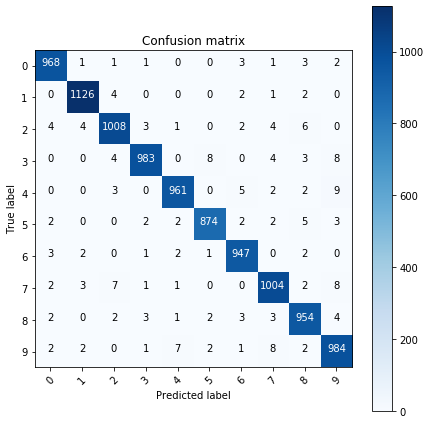

In [0]:
plot_confusion_matrix(cm,classes=list(range(10)))

Here we plot the confusion matrix as a heatmap. Note that the largest number in off diagonal is true label 4 with predicted lable 9.

Let's see some correctly and incorrectly classified examples.

In [0]:
misclassified_idx = np.where(y_pred != y_test)[0]
correctclassified_idx = np.where(y_pred == y_test)[0]

In [0]:
misclassified_idx

array([ 115,  151,  247,  321,  381,  445,  552,  582,  659,  691,  720,
        726,  877,  947,  951,  956,  965, 1014, 1112, 1156, 1178, 1182,
       1226, 1242, 1247, 1290, 1299, 1319, 1328, 1393, 1395, 1414, 1494,
       1496, 1500, 1522, 1530, 1549, 1681, 1717, 1721, 1754, 1790, 1878,
       1901, 1938, 1987, 2004, 2016, 2024, 2035, 2040, 2043, 2044, 2053,
       2070, 2098, 2109, 2118, 2129, 2130, 2135, 2162, 2174, 2182, 2280,
       2293, 2308, 2387, 2406, 2408, 2433, 2488, 2582, 2607, 2648, 2654,
       2713, 2760, 2877, 2896, 2921, 2927, 2930, 2939, 2953, 3060, 3073,
       3117, 3474, 3490, 3503, 3520, 3558, 3559, 3727, 3751, 3767, 3776,
       3780, 3796, 3808, 3818, 3838, 3906, 3941, 3943, 4065, 4078, 4163,
       4176, 4199, 4201, 4205, 4224, 4248, 4289, 4360, 4425, 4477, 4497,
       4567, 4635, 4723, 4740, 4761, 4807, 4814, 4823, 4860, 4880, 5078,
       5140, 5331, 5457, 5600, 5642, 5676, 5734, 5749, 5887, 5936, 5955,
       5973, 5997, 6009, 6011, 6023, 6045, 6059, 63

In [0]:
i_incorct = np.random.choice(misclassified_idx,(1,8))[0]
i_corct = np.random.choice(correctclassified_idx,(1,8))[0]

In [0]:
i_incorct

array([6059, 3818, 1414, 6059, 3838, 4723, 2930,  726])

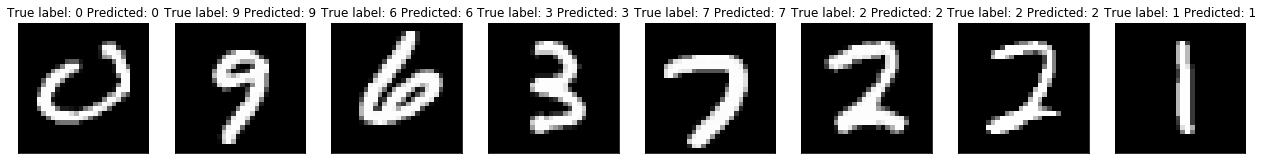

In [0]:
fig_corct = plt.figure()

# plot 8 correctly classified examples
for i,correct in enumerate(i_corct):
  plt.subplot(1,8,i+1)
  plt.imshow(x_test[correct],cmap='gray',interpolation='None')
  plt.title("True label: {} Predicted: {}".format(y_test[correct],y_pred[correct]))
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize'] = (22,3)

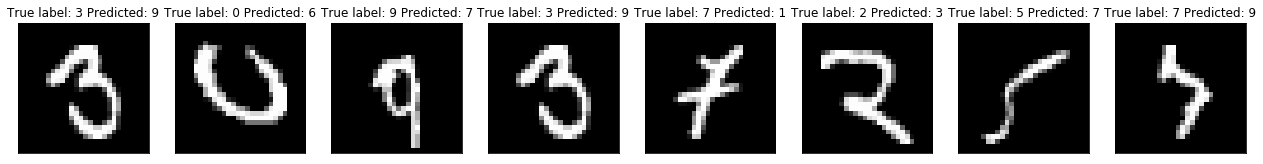

In [0]:
fig_incorct = plt.figure()

# plot 8 correctly classified examples
for i,incorrect in enumerate(i_incorct):
  plt.subplot(1,8,i+1)
  plt.imshow(x_test[incorrect],cmap='gray',interpolation='None')
  plt.title("True label: {} Predicted: {}".format(y_test[incorrect],y_pred[incorrect]))
  plt.xticks([])
  plt.yticks([])
plt.rcParams['figure.figsize'] = (22,3)

In summary, our model is pretty good, it has 98% accuarcy on test set, then we looked into the confusion matrix and find out that our model is most likely to misclassify a digits 4 as a digits 9. At last step, we have showed some examples for correctly classified and incorrectly classified images, for some of those wrong predicted digits, they are even difficult recognize for human.

# **Reference**


*   https://www.tensorflow.org/tutorials/keras/classification
*   Udemy Tensorflow 2.0: Deep Learning and Artificial Intelligence